                                        World Happiness Report Project
Project Description:
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  roc_curve,roc_auc_score,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
health=pd.read_csv(r'C:\Users\HP\Files-main\happiness_score_dataset.csv')
health

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Detailing the dataset.

The following are the columns provided in the given dataset:
1. Country : Name of the country
2. Region : where the country belongs to
3. Happiness Rank : Ranking is given according to the happiness score of each country.
4. Happiness Score: generally the range will be 0-10. 10 is for the best and 0 is worst . it is based several factors.
5. Standard Error: Error of the Happiness Score.
6. Economy(GDP per Capita): It is calculated by dividing the country's GDP bu the country's total population.
7. Family: It contributes to the calculation of happiness score.
8. Health(Life Expectancy):Average number of years of life spent in good health that a person would be expected to live.
9. Freedom: Happiness explained by freedom to make life choices has increased between 2015 and 2019.
10. Trust (Government Corruption): The extent  to which perception of corruption contributes to the calculation of happiness score.
11. Generosity: It is function of the national average of GWP responses to the question.
12. Dystopia Residual: The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

In [6]:
health.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Exploratory Data analysis

In [7]:
health.shape

(158, 12)

In [8]:
health.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

no null presented in the given dataset

In [9]:
health.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

there are two categorical columns and ten numerical columns presented.

In [10]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

there are both categorical and numerical columns presented. and no nulls

In [11]:
#droping rank
health=health.drop('Happiness Rank',axis=1)

In [12]:
#droping Country
health=health.drop('Country', axis=1)

In [13]:
health['Region'].unique()


array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [14]:
health['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [15]:
health.groupby(['Region']).sum()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,
Australia and New Zealand,14.570,0.07454,2.58376,2.62890,1.83993,1.29062,0.78559,0.91063,4.53071
Central and Eastern Europe,154.655,1.31102,27.33071,30.53823,20.84444,10.38979,2.51354,4.41565,58.62059
Eastern Asia,33.757,0.22335,6.91068,6.59656,5.26433,2.77494,0.76617,1.35531,10.08964
Latin America and Caribbean,135.183,1.34479,19.28994,24.30385,15.48515,11.03827,2.57778,4.79133,57.69670
Middle East and Northern Africa,108.138,0.92674,21.33947,18.40980,14.11231,7.23502,3.63404,3.80751,39.60017
North America,14.546,0.07392,2.72080,2.56972,1.76742,1.17901,0.48847,0.85916,4.96187
Southeastern Asia,47.857,0.38422,7.10149,8.46421,6.09621,5.01394,1.36148,3.77335,16.04718
Southern Asia,32.066,0.22513,3.92340,4.51725,3.78581,2.61336,0.71775,2.39000,14.11738
Sub-Saharan Africa,168.112,2.21195,15.21892,32.36340,11.29327,14.63776,4.95511,8.84547,80.79920


In [16]:
health.shape

(158, 10)

In [17]:
health=health.set_index('Region')

In [18]:
health

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,
Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [19]:
health.shape

(158, 9)

In [20]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Western Europe to Sub-Saharan Africa
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 12.3+ KB


Now there is no categorical data presented

In [21]:
health.columns.tolist()

['Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

Visualization

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

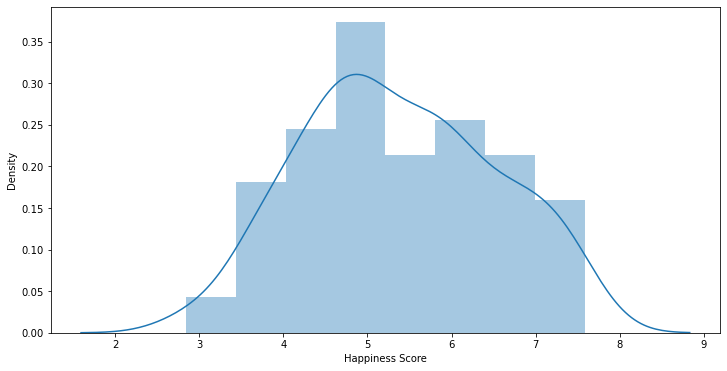

In [22]:
plt.figure(figsize=(12,6))
sns.distplot(health['Happiness Score'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

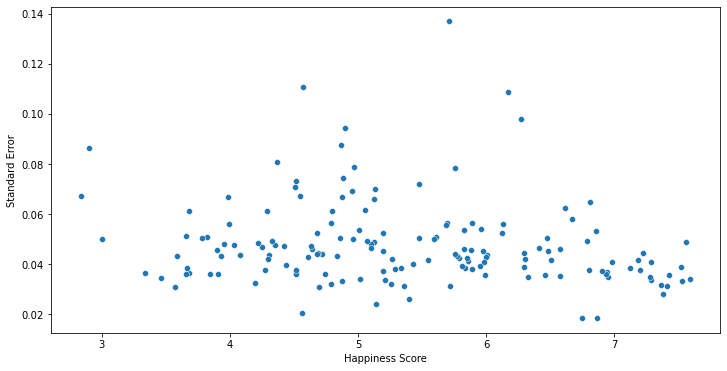

In [23]:
#comparing relation between standard error and target variable(happiness score)
plt.figure(figsize=(12,6))
sns.scatterplot(y='Standard Error', x='Happiness Score',data=health, palette='Set2')


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

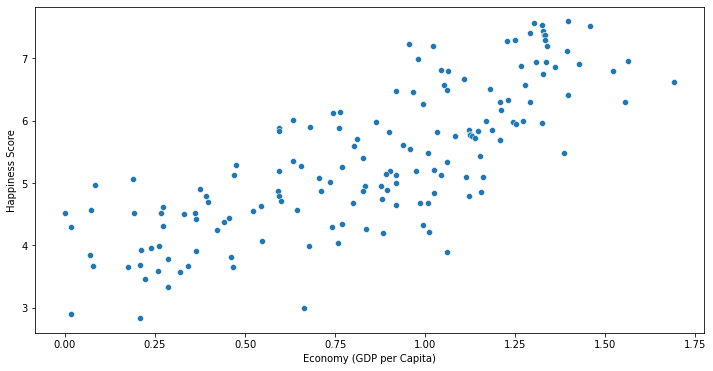

In [24]:
#relationship between Economy and Happiness Score.
plt.figure(figsize=(12,6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score',data=health, palette='Set2')


As we can see for low economy the score is also low, when the economy increases the score is increased upto some extend then it starts decreased.

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

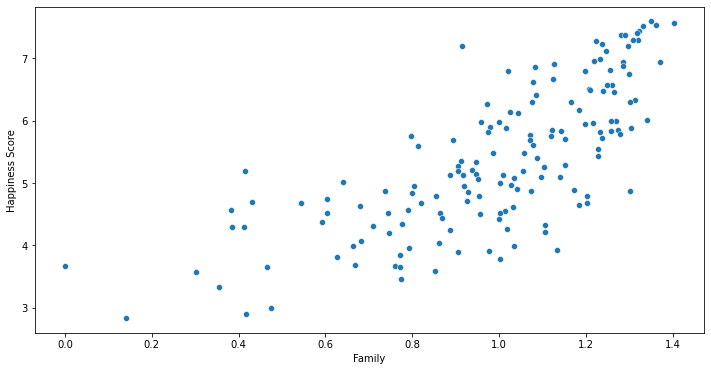

In [25]:
#relationship between family and Happiness score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Family', y='Happiness Score',data=health, palette='Set2')


here the family increases and happiness score also increased. a good relationship is presented.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

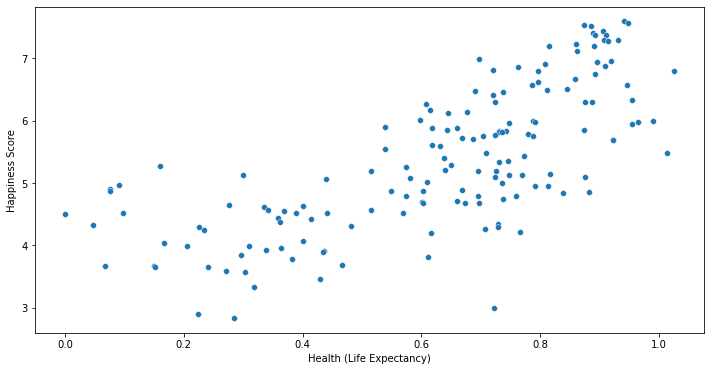

In [26]:
#relationship between health and happiness score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Health (Life Expectancy)', y='Happiness Score',data=health, palette='Set2')


<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

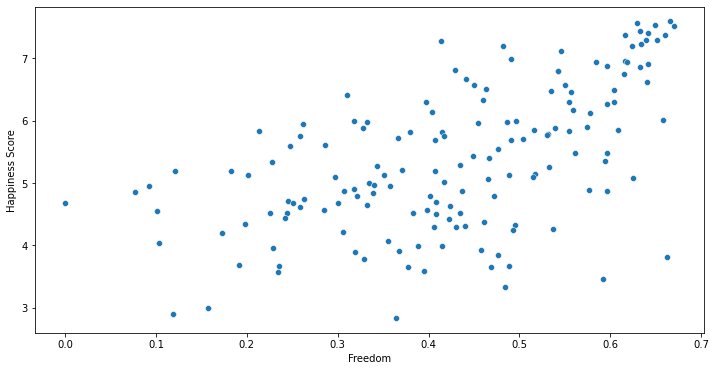

In [27]:
#relationship between freedom and happiness score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Freedom', y='Happiness Score',data=health, palette='Set2')


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

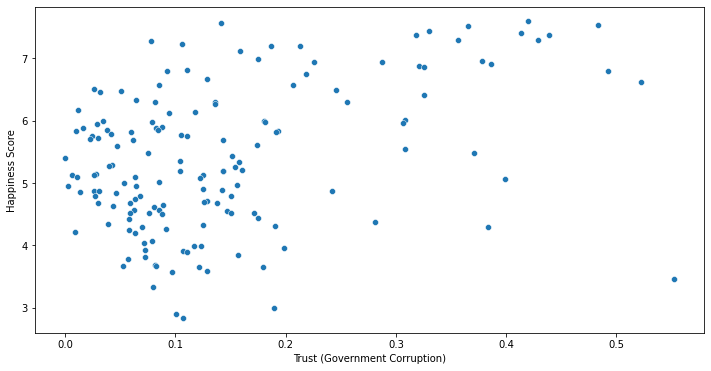

In [28]:
#relationship between trust and happiness score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Trust (Government Corruption)', y='Happiness Score',data=health, palette='Set2')


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

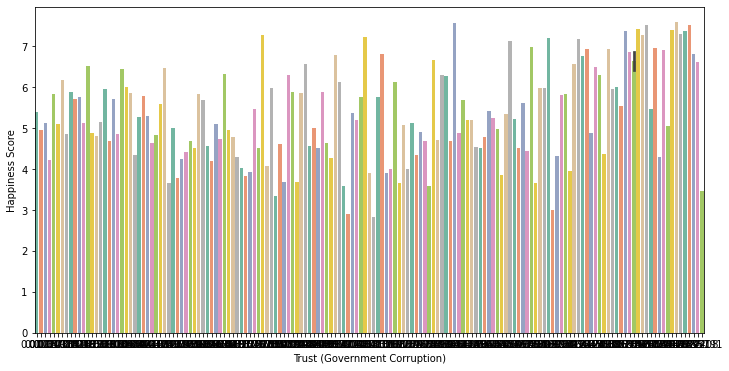

In [29]:
#ralationship between trust and happiness score
plt.figure(figsize=(12,6))
sns.barplot(x='Trust (Government Corruption)', y='Happiness Score',data=health, palette='Set2')


<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

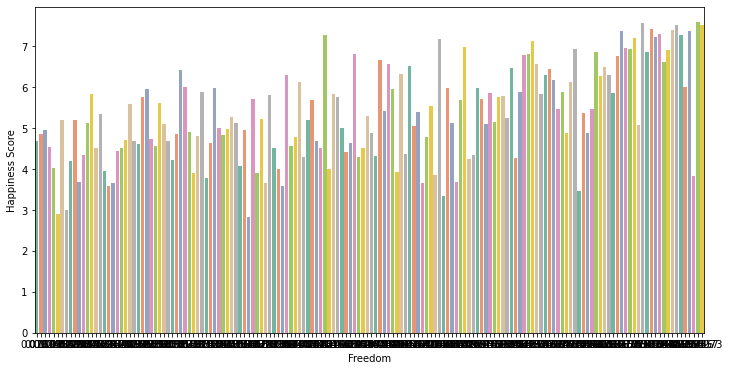

In [30]:
#relationship between freedom and happiness score
plt.figure(figsize=(12,6))
sns.barplot(x='Freedom', y='Happiness Score',data=health, palette='Set2')


<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

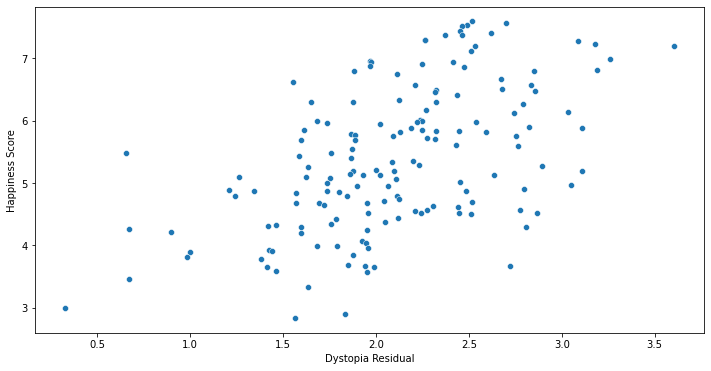

In [31]:
#relationship between Dystopia Residual and happiness score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Dystopia Residual', y='Happiness Score',data=health, palette='Set2')


<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

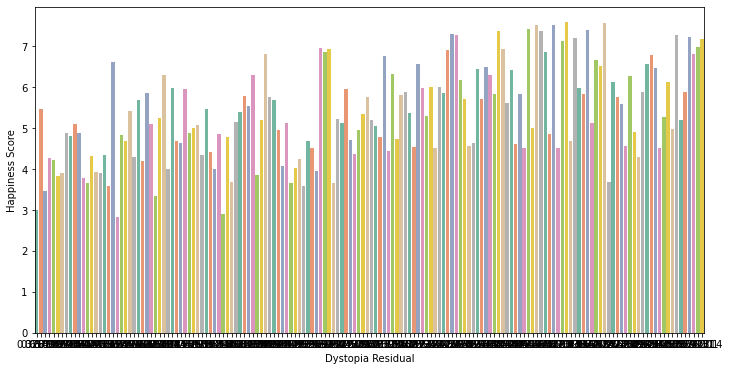

In [32]:
#relationship between Dystopia Residual and happiness score
plt.figure(figsize=(12,6))
sns.barplot(x='Dystopia Residual', y='Happiness Score',data=health, palette='Set2')


<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

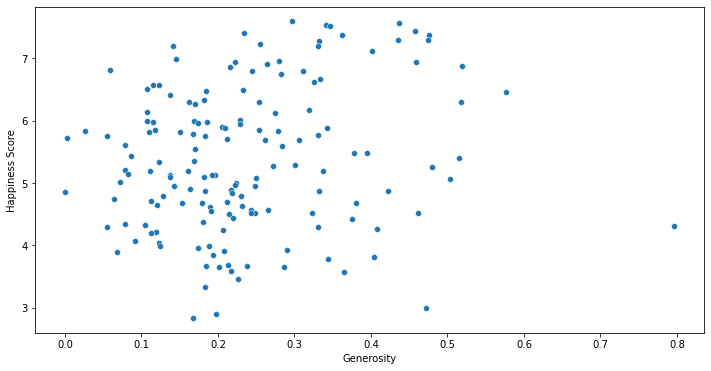

In [33]:
#relationship between generosity and happiness score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Generosity', y='Happiness Score',data=health, palette='Set2')


<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

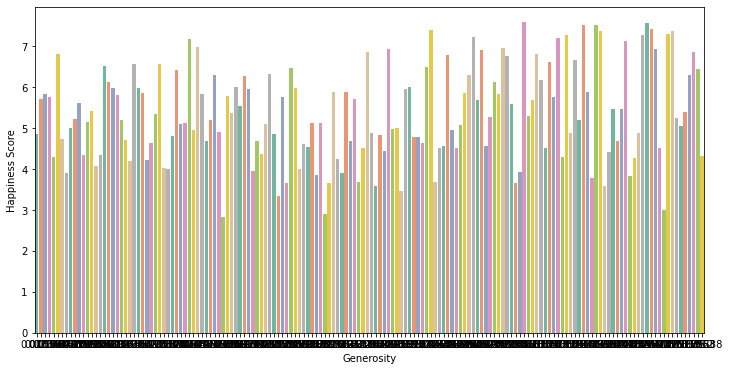

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x='Generosity', y='Happiness Score',data=health, palette='Set2')


From the above graphs there is good relationship between features and label

In [35]:
health.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1. By the describe method the following assumptions were made:
1. The count value in all coulmns are same, so there is no null values.
2. The mean is greater than 50% of median in all columns so there will be right skewness
3. we also have std, min, 25%, 50%, 75% and max values from these method.

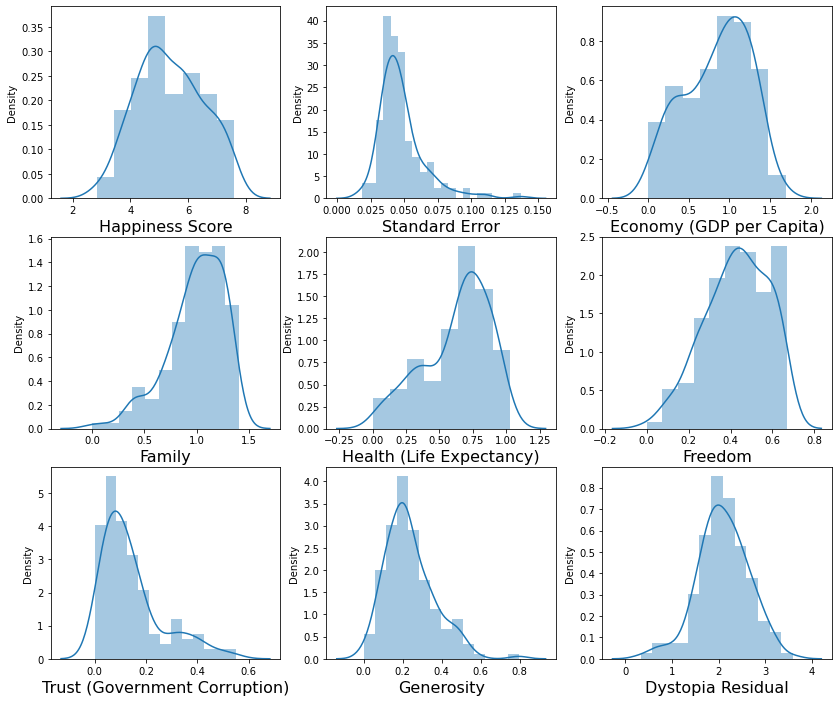

In [36]:
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in health:
    if plotnumber<=9:
    
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(health[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

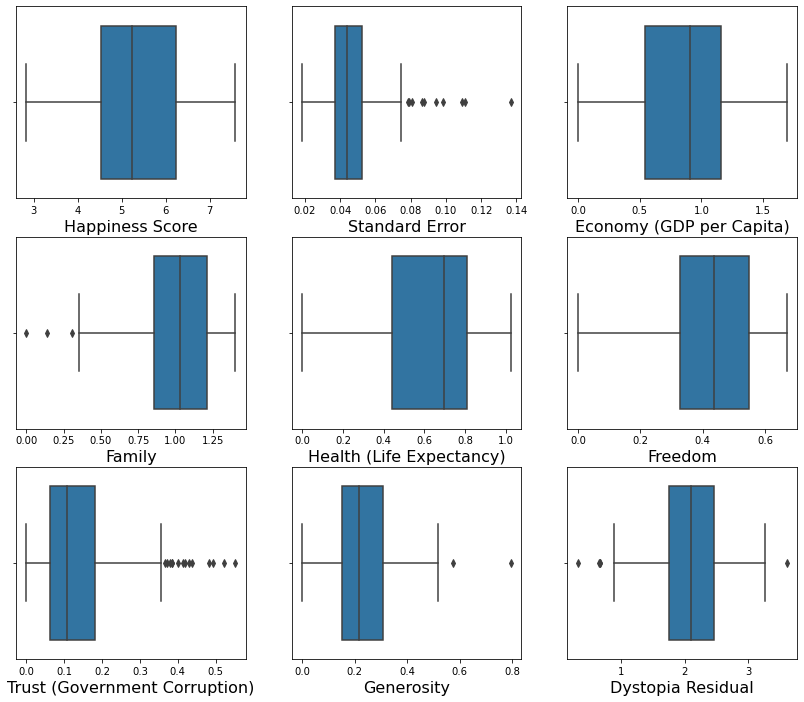

In [37]:
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in health:
    if plotnumber<=9:
    
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(health[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

There are outliers presented in Standard error, family , trust , generosity and Dystopia residual column to overcome this outliers i am using Zscore method as shown below.

In [38]:
#Zscore method
from scipy import stats
from scipy.stats import zscore
data=health.drop('Happiness Score', axis=1)
z=np.abs(zscore(data))

threshold=3
np.where(z>3)
data=data[(z<3).all(axis=1)]

In [39]:
z

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,
Western Europe,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
Western Europe,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
Western Europe,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
Western Europe,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
North America,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
Sub-Saharan Africa,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
Middle East and Northern Africa,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430


In [40]:
data

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,
Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
Sub-Saharan Africa,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
Southern Asia,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


In [41]:
loss_data=(158-149)/158*100
loss_data

5.69620253164557

In [42]:
#skewness
health.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

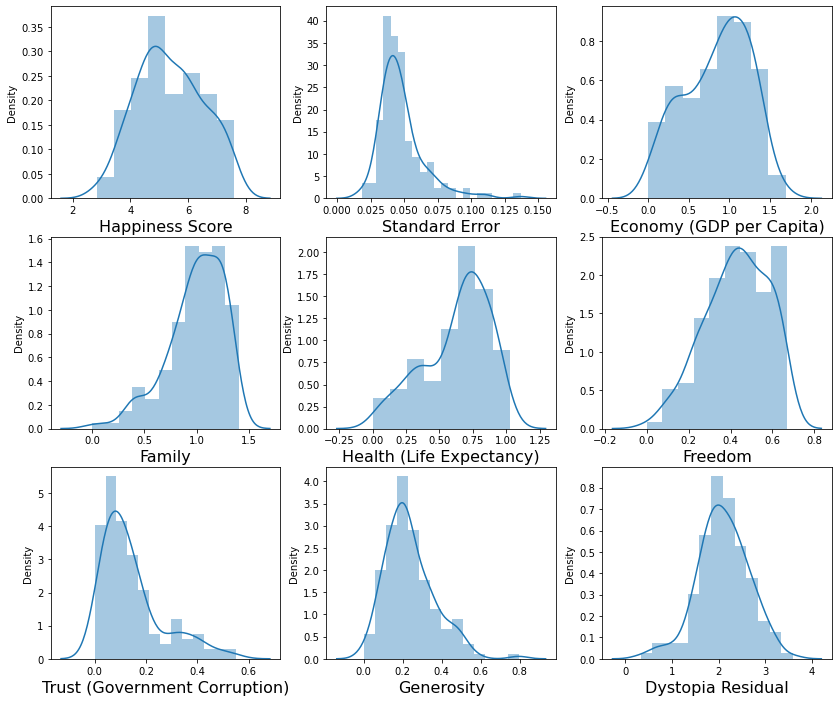

In [43]:
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in health:
    if plotnumber<=9:
    
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(health[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

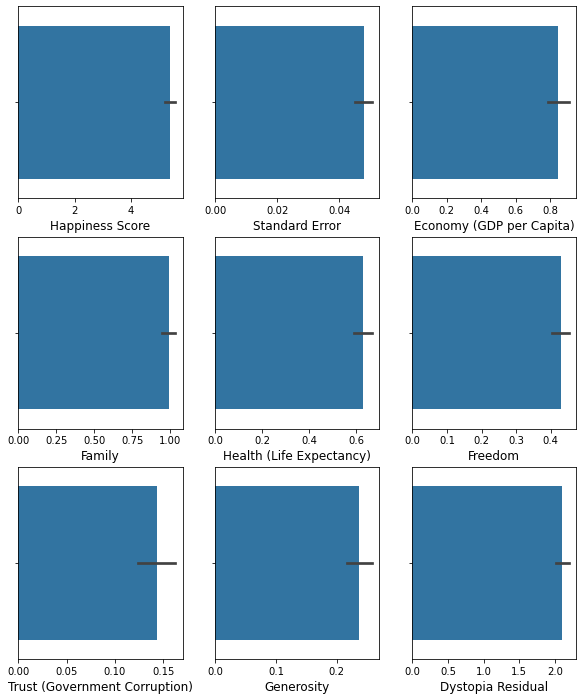

In [44]:
plt.figure(figsize=(10,12),facecolor="white")
plotnumber=1
for columns in health:
    if plotnumber<=9:
    
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(health[columns])
        plt.xlabel(columns, fontsize=12)
    plotnumber+=1
plt.show()

In [48]:
#corelation b/n features and target variable.
corr=health.corr()
corr

,Happiness Score,Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Family,0.740605,-0.120728,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


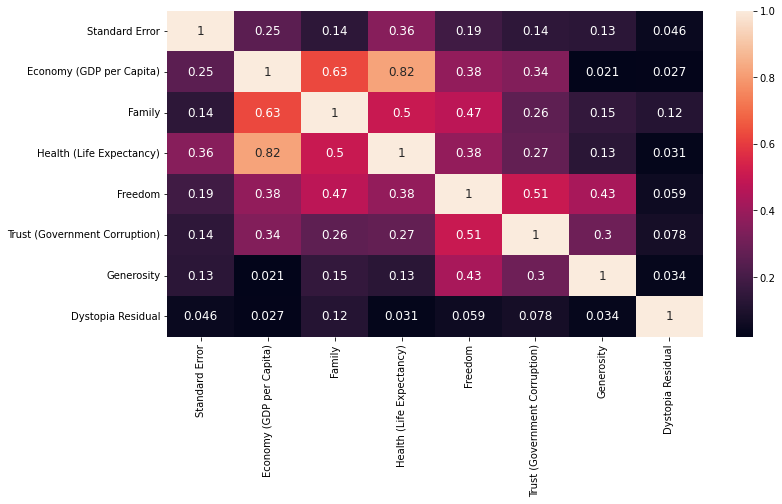

In [45]:
df_corr=data.corr().abs()
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

Here we can see Economy columns has highly correlated with family and health column so i am dropping the economy column.

In [46]:
 #dropping health column
    health=health.drop('Economy (GDP per Capita)', axis=1)

In [49]:
corr['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

In [50]:
a=health.drop('Happiness Score', axis=1)
b=health['Happiness Score']

In [51]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.805926,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.055889,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.854487,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,-0.531526,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-0.722845,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...
153,-0.774917,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-0.662582,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,0.132534,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,2.263962,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [52]:
x_scaled

array([[-0.80592569,  1.32028142,  1.26340809, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 0.05588945,  1.51445776,  1.28943383, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.8544869 ,  1.36105403,  0.99222882, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 0.13253425, -1.90108634,  0.37219907, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 2.26396166, -2.1184666 , -1.64964766, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.13418227, -3.13472485, -1.40412871, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.133353,Standard Error
1,1.598282,Family
2,1.567902,Health (Life Expectancy)
3,1.749648,Freedom
4,1.371618,Trust (Government Corruption)
5,1.205226,Generosity
6,1.052736,Dystopia Residual


there is no multicolinearity.

Modelling

In [54]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,600):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.25, random_state=k)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The max r2 score is', Accu_max, 'at random state is', Rs_max)

The max r2 score is 0.9899172603413258 at random state is 494


In [55]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.25, random_state=494)

In [56]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lr)))



R2_score: 0.9899172603413258
R2_score on training data: 95.96704131232447
Mean Absolute Error: 0.09750309447193668
Mean Squared Error: 0.016402226403780244
Root Mean Squared Error: 0.12807117710000265


In [58]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rfr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))



R2_score: 0.8904529590041173
R2_score on training data: 97.82646490094143
Mean Absolute Error: 0.3113869999999994
Mean Squared Error: 0.17820705771499948
Root Mean Squared Error: 0.42214577780074913


In [59]:
Dr=DecisionTreeRegressor()
Dr.fit(x_train,y_train)
pred_Dr=Dr.predict(x_test)
pred_train=Dr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_Dr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_Dr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_Dr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_Dr)))


R2_score: 0.8241688250738648
R2_score on training data: 100.0
Mean Absolute Error: 0.42577499999999996
Mean Squared Error: 0.28603562500000007
Root Mean Squared Error: 0.5348229847342016


In [60]:
tr=ExtraTreesRegressor()
tr.fit(x_train,y_train)
pred_tr=tr.predict(x_test)
pred_train=tr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_tr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_tr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_tr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_tr)))
sv=SVR()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
pred_train=sv.predict(x_train)
print('R2_score:',r2_score(y_test,pred_sv))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_sv)))


R2_score: 0.9143977825154557
R2_score on training data: 100.0
Mean Absolute Error: 0.2691242499999996
Mean Squared Error: 0.1392545081374994
Root Mean Squared Error: 0.3731682035456657
R2_score: 0.9041734297957582
R2_score on training data: 97.01813874625773
Mean Absolute Error: 0.272512700549005
Mean Squared Error: 0.15588710540944314
Root Mean Squared Error: 0.39482541130155635


In [61]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))


R2_score: 0.881987150235284
R2_score on training data: 86.73871561216514
Mean Absolute Error: 0.3532749999999999
Mean Squared Error: 0.19197892099999986
Root Mean Squared Error: 0.43815399233602775


In [62]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_gb))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))


R2_score: 0.9338290019083918
R2_score on training data: 99.8150111758635
Mean Absolute Error: 0.24565129895162657
Mean Squared Error: 0.10764452210455903
Root Mean Squared Error: 0.328092246334105


In [63]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_xgb))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xgb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))


R2_score: 0.9145431152738183
R2_score on training data: 99.99994037574143
Mean Absolute Error: 0.282832029390335
Mean Squared Error: 0.13901808620385367
Root Mean Squared Error: 0.3728512923456933


In [64]:
las=Lasso()
las.fit(x_train,y_train)
pred_las=las.predict(x_test)
pred_train=las.predict(x_train)
print('R2_score:',r2_score(y_test,pred_las))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_las))
print('Mean Squared Error:',mean_squared_error(y_test,pred_las))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_las)))


R2_score: -0.03629239216090219
R2_score on training data: 0.0
Mean Absolute Error: 1.0913389830508475
Mean Squared Error: 1.685801975667911
Root Mean Squared Error: 1.2983843713122516


In [65]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))


R2_score: 0.9898180835903652
R2_score on training data: 95.96331606005978
Mean Absolute Error: 0.09748959287436582
Mean Squared Error: 0.016563563458818584
Root Mean Squared Error: 0.12869950838607963


Crossvalidation

In [66]:

from sklearn.model_selection import cross_val_score

In [67]:
score=cross_val_score(lr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[ 0.25491123  0.21999252  0.3608375  -0.86483373  0.54455309]
0.10309212061564407
Difference between R2 score and cross validation score is-  0.8868251397256817


In [68]:
score=cross_val_score(rfr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_rfr)-score.mean() )

[-8.14688401 -2.22354211 -1.13776278 -2.74027226 -6.04446894]
-4.058586020445672
Difference between R2 score and cross validation score is-  4.949038979449789


In [69]:
score=cross_val_score(Dr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_Dr)-score.mean() )

[-11.62830488  -9.01145762  -8.5907536  -13.59417383  -7.50821319]
-10.066580625006907
Difference between R2 score and cross validation score is-  10.890749450080772


In [70]:
score=cross_val_score(tr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_tr)-score.mean() )

[-7.24445694 -1.35480488 -0.91485588 -2.65610518 -5.3807162 ]
-3.5101878162333096
Difference between R2 score and cross validation score is-  4.424585598748765


In [71]:
score=cross_val_score(gb, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_gb)-score.mean() )

[-5.24345183 -2.76500014 -1.41683975 -3.26102265 -3.89144188]
-3.315551252751676
Difference between R2 score and cross validation score is-  4.249380254660068


In [72]:
score=cross_val_score(xgb, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_xgb)-score.mean() )

[-8.01656763 -2.12353084 -2.51889565 -6.51354767 -3.49467462]
-4.533443283797164
Difference between R2 score and cross validation score is-  5.447986399070982


In [73]:
score=cross_val_score(las, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_las)-score.mean() )

[-39.5383371  -12.87043242  -0.27425903 -30.73906532 -23.65659767]
-21.415738307203014
Difference between R2 score and cross validation score is-  21.379445915042112


In [74]:
score=cross_val_score(rd, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_rd)-score.mean() )

[ 0.17240225  0.21849751  0.36224611 -0.86047416  0.54141586]
0.086817513836244
Difference between R2 score and cross validation score is-  0.9030005697541211


Comparing all methods the difference between R2 score and crossvalidation score is very less (0.86)in Linear Regression model, so i have choosen Linear Regression  model whose r2 score is 0.96. Now i am trying to increase my test result by using hyperparameter tuning.

Hyperparameter tuning

In [367]:
grid_param={'alpha': range(10,20),
 'copy_X': [True],
 'fit_intercept': [True],
 'max_iter': [None],
 'normalize': ['deprecated'],
 'positive': [False],
 'random_state': ['None'],
 'solver': ['auto'],
}

    

In [368]:
rd.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [369]:
grid_search=GridSearchCV(estimator=rd,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)

In [370]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': range(10, 20), 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [None],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': ['None'], 'solver': ['auto']})

In [371]:
grid_search.best_params_

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': 'None',
 'solver': 'auto'}

In [462]:
final_model=Ridge(alpha=0.1
                  ,
 copy_X= True,
 fit_intercept= True,
 max_iter=' None',
 normalize= 'deprecated',
 positive= False,
 random_state= 'None',
 solver= 'auto')

In [463]:
final_model.fit(x_train,y_train)

Ridge(alpha=0.1, max_iter=' None', random_state='None')

In [464]:
final_model.score(x_test,y_test)

0.9899104629887369

In [465]:
pred=final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 0.9899104629887369
Mean Absolute Error: 0.09745107467920842
Mean Squared Error: 0.01641328408451827
Root Mean Squared Error: 0.12811433988636195


the cross validation score is low in linear regreesion model but after tuning the parameter there is no change in r2 score so i have choosen ridge method here it is slightly increased.

In [469]:
import pickle
filename='Happiness Score'
pickle.dump(rd, open(filename,'wb'))


In [470]:
import pickle
loaded_model=pickle.load(open('Happiness Score','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.98180835903652


In [471]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
original,4.44828,4.886506,3.108782,4.667201,4.871387,6.664594,4.505353,5.469255,7.360405,7.207676,...,6.785998,4.055202,4.480078,4.193975,4.996305,4.990854,7.233205,2.79693,4.348237,3.657842
predicted,4.36900,4.610000,2.905000,4.550000,4.681000,6.575000,4.633000,5.589000,7.364000,7.187000,...,6.867000,4.077000,4.297000,4.252000,4.885000,5.013000,7.284000,2.83900,4.292000,3.656000


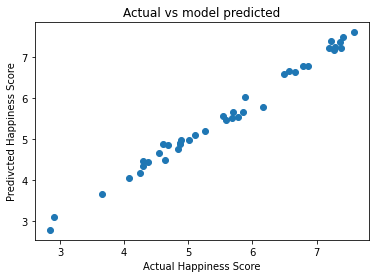

In [473]:
#plotting between actual and predicted score
plt.scatter(y_test,pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predivcted Happiness Score')
plt.title('Actual vs model predicted')
plt.show()

the predicted values are almost closer to the actual values. finally it is done.